In [1]:
import pandas as pd
import numpy as np

# Ruta del archivo csv
df = pd.read_csv("C:/Users/xavsc/Desktop/1ERS2025/GEREN2/Practica1/ventas_tienda_online.csv") 
# leyendo el csv
df.head()



,order_id,purchase_date,customer_id,customer_gender,customer_age,product_category,product_name,product_price,quantity,order_total,payment_method,shipping_region
0,96,8/12/23,822,Masculino,18.0,Accesorios,Bolso,90.72,3,272.16,PayPal,Oeste
1,142,3/09/23,139,Femenino,18.0,Ropa,Pantalón,131.68,3,395.04,PayPal,Oeste
2,216,24/08/23,86,Masculino,18.0,Calzado,Zapatillas,36.18,1,36.18,Transferencia bancaria,Este
3,235,15/03/23,473,Masculino,18.0,Ropa,Vestido,78.55,5,392.75,Transferencia bancaria,Centro
4,284,24/04/23,113,Masculino,18.0,Calzado,Sandalias,116.37,1,116.37,Tarjeta de crédito,Norte


In [2]:
# Limpiando el csv 

# Eliminar duplicados y vacios
print(df.isnull().sum())
print("Duplicados:", df.duplicated().sum())
df = df.drop_duplicates()
df = df.dropna()

# ver los tipos de datos
print(df.dtypes)


order_id             0
purchase_date        0
customer_id          0
customer_gender      4
customer_age         2
product_category     2
product_name        16
product_price        1
quantity             0
order_total          0
payment_method       2
shipping_region      0
dtype: int64
Duplicados: 2
order_id              int64
purchase_date        object
customer_id           int64
customer_gender      object
customer_age        float64
product_category     object
product_name         object
product_price       float64
quantity              int64
order_total         float64
payment_method       object
shipping_region      object
dtype: object


In [3]:
# Valores nulos en cada columna
print("Valores nulos:\n", df.isnull().sum())

# Cantidad de duplicados
print("Duplicados:", df.duplicated().sum())
df = df.dropna()

# Convertir 'purchase_date' a datetime
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Asegurar que 'customer_age' sea un número entero
df['customer_age'] = df['customer_age'].astype(int)

# Verificar nuevamente los tipos de datos
print(df.dtypes)



Valores nulos:
 order_id            0
purchase_date       0
customer_id         0
customer_gender     0
customer_age        0
product_category    0
product_name        0
product_price       0
quantity            0
order_total         0
payment_method      0
shipping_region     0
dtype: int64
Duplicados: 0
order_id                     int64
purchase_date       datetime64[ns]
customer_id                  int64
customer_gender             object
customer_age                 int64
product_category            object
product_name                object
product_price              float64
quantity                     int64
order_total                float64
payment_method              object
shipping_region             object
dtype: object


C:\Users\xavsc\AppData\Local\Temp\ipykernel_22704\825141879.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['purchase_date'] = pd.to_datetime(df['purchase_date'])


In [6]:
import pandas as pd

# Ruta del archivo original
ruta_original = "C:/Users/xavsc/Desktop/1ERS2025/GEREN2/Practica1/ventas_tienda_online.csv"
# Ruta del archivo limpio
ruta_limpia = "C:/Users/xavsc/Desktop/1ERS2025/GEREN2/Practica1/ventas_tienda_online_limpio.csv"

# Leer el CSV
df = pd.read_csv(ruta_original)

# Eliminar duplicados y valores nulos
df = df.drop_duplicates().dropna()

# Convertir 'purchase_date' a datetime
if 'purchase_date' in df.columns:
    df['purchase_date'] = pd.to_datetime(df['purchase_date'], errors='coerce')

# Asegurar que 'customer_age' sea un número entero si existe
if 'customer_age' in df.columns:
    df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce').fillna(0).astype(int)

# Guardar el archivo limpio
df.to_csv(ruta_limpia, index=False)

print("Archivo CSV limpio generado exitosamente.")
i

Archivo CSV limpio generado exitosamente.


C:\Users\xavsc\AppData\Local\Temp\ipykernel_22704\1422870723.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['purchase_date'] = pd.to_datetime(df['purchase_date'], errors='coerce')


NameError: name 'i' is not defined

In [16]:
import pandas as pd
import mysql.connector

# Conectar a MySQL
conn = mysql.connector.connect(
    host="localhost",  # Cambia esto si tu servidor MySQL está en otro host
    user="root",  # Reemplaza con tu usuario de MySQL
    password="admin123",  # Reemplaza con tu contraseña de MySQL
    database="tienda_ventas"
)
cursor = conn.cursor()

# Cargar el archivo CSV limpio
file_path = "C:/Users/xavsc/Desktop/1ERS2025/GEREN2/Practica1/ventas_tienda_online_limpio.csv"
df = pd.read_csv(file_path)

# Insertar datos en la tabla customers
for _, row in df[['customer_id', 'customer_gender', 'customer_age']].drop_duplicates().iterrows():
    cursor.execute(
        "INSERT IGNORE INTO customers (customer_id, customer_gender, customer_age) VALUES (%s, %s, %s)",
        (row['customer_id'], row['customer_gender'], row['customer_age'])
    )

# Insertar datos en la tabla products
for _, row in df[['product_name', 'product_category', 'product_price']].drop_duplicates().iterrows():
    cursor.execute(
        "INSERT IGNORE INTO products (product_name, product_category, product_price) VALUES (%s, %s, %s)",
        (row['product_name'], row['product_category'], row['product_price'])
    )

# Insertar datos en la tabla orders
for _, row in df[['order_id', 'purchase_date', 'customer_id', 'order_total', 'payment_method', 'shipping_region']].drop_duplicates().iterrows():
    cursor.execute(
        "INSERT IGNORE INTO orders (order_id, purchase_date, customer_id, order_total, payment_method, shipping_region) VALUES (%s, %s, %s, %s, %s, %s)",
        (row['order_id'], row['purchase_date'], row['customer_id'], row['order_total'], row['payment_method'], row['shipping_region'])
    )

# Insertar datos en la tabla order_details
for _, row in df[['order_id', 'product_name', 'quantity']].iterrows():
    cursor.execute(
        "INSERT IGNORE INTO order_details (order_id, product_name, quantity) VALUES (%s, %s, %s)",
        (row['order_id'], row['product_name'], row['quantity'])
    )

# Confirmar cambios y cerrar conexión
conn.commit()
cursor.close()
conn.close()

print("Datos insertados correctamente en MySQL.")


Datos insertados correctamente en MySQL.


In [1]:
import pandas as pd
import mysql.connector

# Conectar a MySQL
conn = mysql.connector.connect(
    host="localhost",  # Cambia esto si tu servidor MySQL está en otro host
    user="root",  # Reemplaza con tu usuario de MySQL
    password="admin123",  # Reemplaza con tu contraseña de MySQL
    database="tienda_ventas"
)
# Consultas SQL y carga en DataFrames
df_customers = pd.read_sql_query("SELECT * FROM customers;", conn)
df_orders = pd.read_sql_query("SELECT * FROM orders;", conn)
df_products = pd.read_sql_query("SELECT * FROM products;", conn)
df_order_details = pd.read_sql_query("SELECT * FROM order_details;", conn)

# Cerrar conexión
conn.close()

# Mostrar primeras filas de cada DataFrame
print(df_customers.head())
print(df_orders.head())
print(df_products.head())
print(df_order_details.head())

   customer_id customer_gender  customer_age
0            1        Femenino            20
1            2        Femenino            28
2            3       Masculino            20
3            4       Masculino            26
4            5       Masculino            31
   order_id purchase_date  customer_id  order_total      payment_method  \
0         1    2023-07-23          103       301.94            Efectivo   
1         2    2023-07-20          436       473.97            Efectivo   
2         3    2023-07-29          861        81.20              PayPal   
3         4    2023-11-21          271       776.40            Efectivo   
4         5    2023-12-02          107        22.48  Tarjeta de crédito   

  shipping_region  
0          Centro  
1           Norte  
2          Centro  
3           Oeste  
4          Centro  
  product_name product_category  product_price
0        Bolso       Accesorios          90.72
1        Botas          Calzado          54.74
2      Bufanda    

C:\Users\xavsc\AppData\Local\Temp\ipykernel_28348\407611688.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customers = pd.read_sql_query("SELECT * FROM customers;", conn)
C:\Users\xavsc\AppData\Local\Temp\ipykernel_28348\407611688.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orders = pd.read_sql_query("SELECT * FROM orders;", conn)
C:\Users\xavsc\AppData\Local\Temp\ipykernel_28348\407611688.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_products = pd.read_sql_query("SELECT * FROM products;", con

In [ ]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv  # Cargar .env en VS Code

# Cargar variables de entorno
load_dotenv()

def obtener_datos():
    motor = create_engine(f"mysql+mysqlconnector://{os.getenv('MYSQLUSER')}:{os.getenv('MYSQLPASSWORD')}@{os.getenv('MYSQLHOST')}:{os.getenv('MYSQLPORT')}/{os.getenv('MYSQLDATABASE')}")
    
    consulta = "SELECT * FROM tienda_ventas;"
    
    datos = pd.read_sql(consulta, motor)
    return datos

# Llamar a la función y mostrar los datos
df = obtener_datos()
print(df.head())


   order_id purchase_date  customer_id customer_gender  customer_age  \
0         1    2023-07-23          103        Femenino            76   
1         2    2023-07-20          436       Masculino            49   
2         3    2023-07-29          861       Masculino            38   
3         4    2023-11-21          271        Femenino            57   
4         5    2023-12-02          107        Femenino            45   

  product_category product_name  product_price  quantity  order_total  \
0             Ropa     Chaqueta         150.97         2       301.94   
1       Accesorios        Reloj         157.99         3       473.97   
2       Accesorios        Gorro          81.20         1        81.20   
3          Calzado    Pantuflas         155.28         5       776.40   
4             Ropa     Camiseta          11.24         2        22.48   

       payment_method shipping_region  
0            Efectivo          Centro  
1            Efectivo           Norte  
2       

In [23]:
import pandas as pd

# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas:", columnas_numericas)

# Calcular estadísticas básicas
media = df[columnas_numericas].mean()
mediana = df[columnas_numericas].median()
moda = df[columnas_numericas].mode().iloc[0]  # Tomamos solo la primera moda

# Crear un DataFrame con los resultados
estadisticas = pd.DataFrame({'Media': media, 'Mediana': mediana, 'Moda': moda})

# Mostrar resultados
print("\n📊 Estadísticas Básicas:\n", estadisticas)

# Guardar en un archivo CSV
estadisticas.to_csv("estadisticas_basicas.csv", index=True)


Columnas numéricas: Index(['order_id', 'customer_id', 'customer_age', 'product_price', 'quantity',
       'order_total'],
      dtype='object')

📊 Estadísticas Básicas:
                      Media  Mediana    Moda
order_id       4993.887140  4994.00    1.00
customer_id     504.255588   506.00  726.00
customer_age     48.320637    48.00   32.00
product_price   104.909815   104.84   17.97
quantity          3.000200     3.00    2.00
order_total     314.673617   254.95  150.20


<Figure size 1200x600 with 0 Axes>

c:\Users\xavsc\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


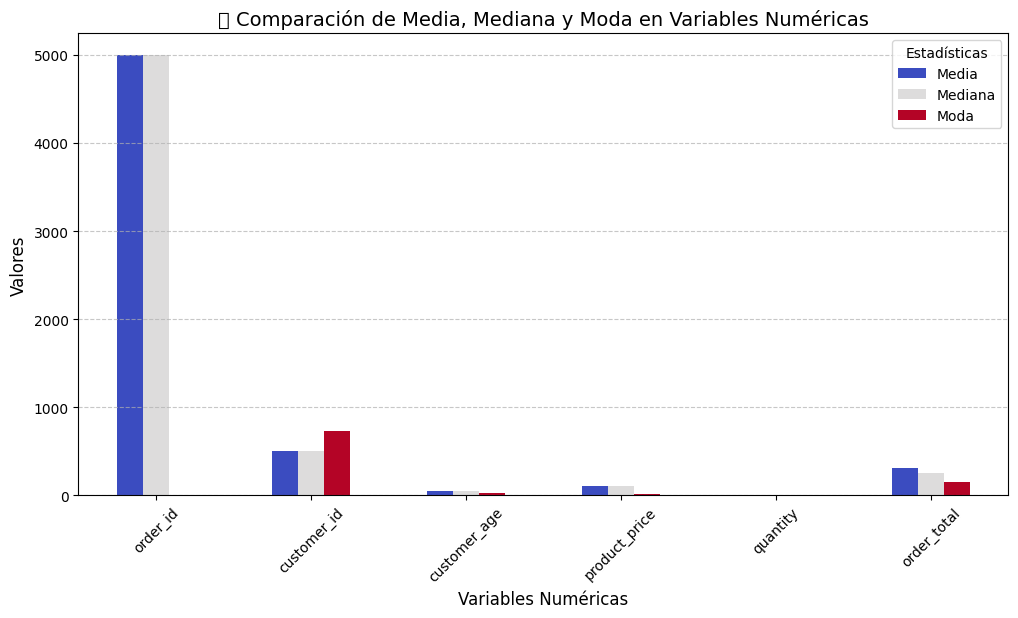

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular estadísticas básicas
media = df[columnas_numericas].mean()
mediana = df[columnas_numericas].median()
moda = df[columnas_numericas].mode().iloc[0]  # Tomamos solo la primera moda

# Crear un DataFrame con los resultados
estadisticas = pd.DataFrame({'Media': media, 'Mediana': mediana, 'Moda': moda})

#  Generar gráficas de comparación
plt.figure(figsize=(12, 6))
estadisticas.plot(kind='bar', figsize=(12, 6), colormap="coolwarm")

# Personalizar gráfico
plt.title(" Comparación de Media, Mediana y Moda en Variables Numéricas", fontsize=14)
plt.xlabel("Variables Numéricas", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Estadísticas")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()


📊 Ventas por Categoría de Producto:
 product_category
Ropa          3363
Calzado       3312
Accesorios    3302
Name: count, dtype: int64


C:\Users\xavsc\AppData\Local\Temp\ipykernel_22704\2321174112.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['product_category'], order=ventas_por_categoria.index, palette="coolwarm")
c:\Users\xavsc\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


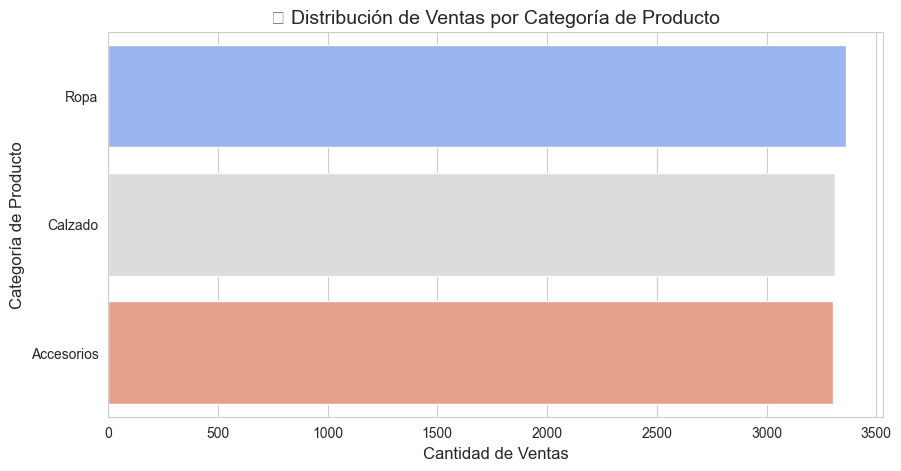


📊 Ventas por Región de Envío:
 shipping_region
Oeste     2048
Norte     2035
Este      1985
Centro    1966
Sur       1943
Name: count, dtype: int64


C:\Users\xavsc\AppData\Local\Temp\ipykernel_22704\2321174112.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['shipping_region'], order=ventas_por_region.index, palette="viridis")
c:\Users\xavsc\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


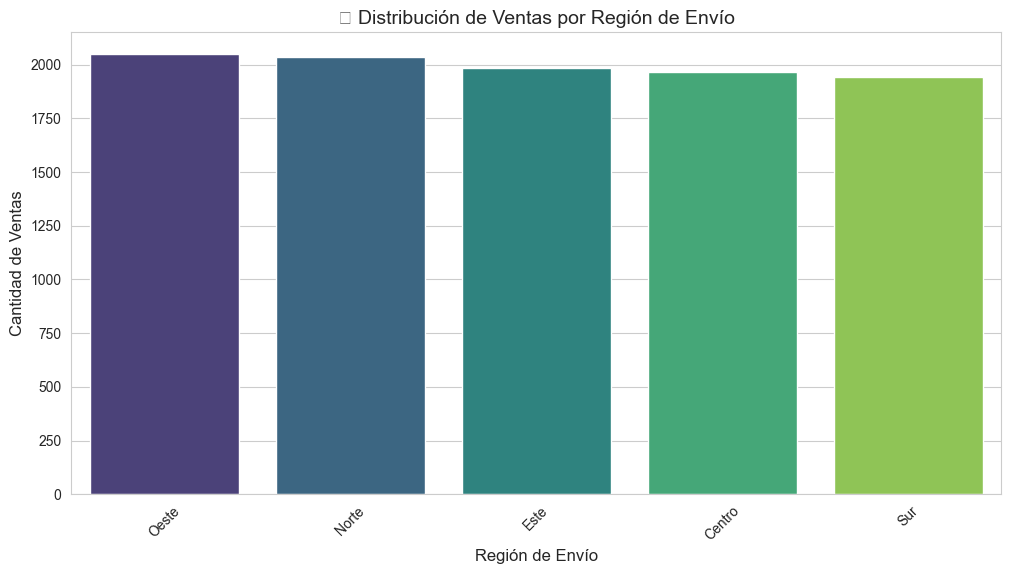

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Configuración de estilo para los gráficos
sns.set_style("whitegrid")

# 📌 1. Ventas por Categoría de Producto
ventas_por_categoria = df['product_category'].value_counts()
print(" Ventas por Categoría de Producto:\n", ventas_por_categoria)

plt.figure(figsize=(10, 5))
sns.countplot(y=df['product_category'], order=ventas_por_categoria.index, palette="coolwarm")
plt.title(" Distribución de Ventas por Categoría de Producto", fontsize=14)
plt.xlabel("Cantidad de Ventas", fontsize=12)
plt.ylabel("Categoría de Producto", fontsize=12)
plt.show()

# 📌 2. Ventas por Región de Envío
ventas_por_region = df['shipping_region'].value_counts()
print("\n Ventas por Región de Envío:\n", ventas_por_region)

plt.figure(figsize=(12, 6))
sns.countplot(x=df['shipping_region'], order=ventas_por_region.index, palette="viridis")
plt.title(" Distribución de Ventas por Región de Envío", fontsize=14)
plt.xlabel("Región de Envío", fontsize=12)
plt.ylabel("Cantidad de Ventas", fontsize=12)
plt.xticks(rotation=45)
plt.show()



 Ventas Totales por Mes:
 month
8     281121.29
3     277744.24
7     277262.27
1     275271.43
6     271332.09
10    268798.48
12    261678.52
11    255451.44
5     250736.63
4     243594.92
2     242586.61
9     233920.76
Name: order_total, dtype: float64


C:\Users\xavsc\AppData\Local\Temp\ipykernel_22704\2021333214.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_mes.index, y=ventas_por_mes.values, palette="magma")


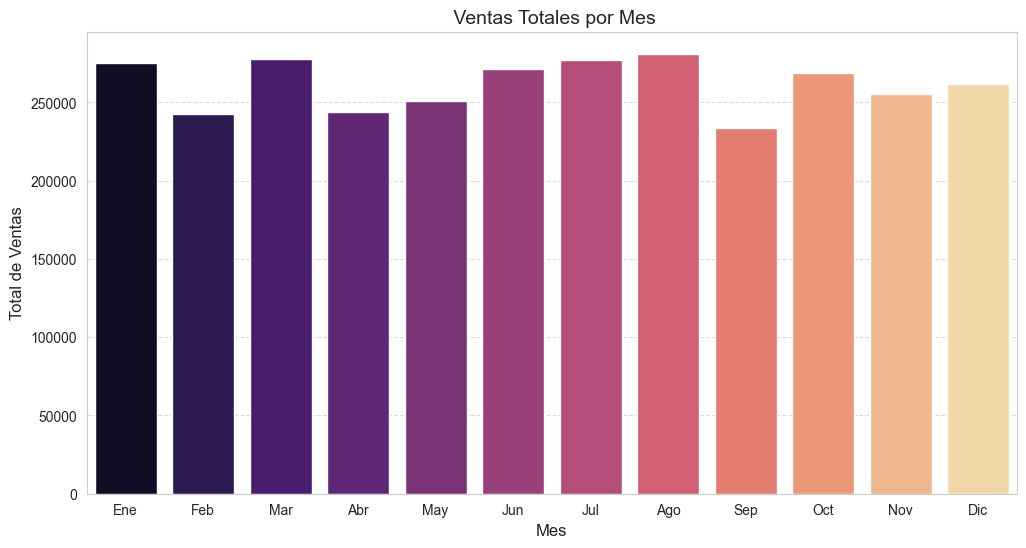

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Asegurarnos de que 'purchase_date' sea tipo datetime
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# 🔹 Extraer el mes de la fecha de compra
df['month'] = df['purchase_date'].dt.month

# 🔹 Calcular ventas totales por mes
ventas_por_mes = df.groupby('month')['order_total'].sum().sort_values(ascending=False)

# 🔹 Imprimir los datos antes de graficar
print(" Ventas Totales por Mes:\n", ventas_por_mes)

# 🔹 Graficar las ventas por mes
plt.figure(figsize=(12, 6))
sns.barplot(x=ventas_por_mes.index, y=ventas_por_mes.values, palette="magma")

# Personalizar gráfico
plt.title(" Ventas Totales por Mes", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Total de Ventas", fontsize=12)
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()


Productos más vendidos:
        product_name  total_vendido
0           Sweater         2146.0
1          Chaqueta         2119.0
2             Gorro         2046.0
3  Zapatos formales         2036.0
4          Camiseta         2031.0
5         Sandalias         2027.0
6           Bufanda         1998.0
7          Cinturón         1996.0
8        Zapatillas         1989.0
9         Pantuflas         1981.0

Productos menos vendidos:
    product_name  total_vendido
5     Sandalias         2027.0
6       Bufanda         1998.0
7      Cinturón         1996.0
8    Zapatillas         1989.0
9     Pantuflas         1981.0
10     Pantalón         1935.0
11        Bolso         1928.0
12        Botas         1922.0
13      Vestido         1898.0
14        Reloj         1881.0


C:\Users\xavsc\AppData\Local\Temp\ipykernel_22704\606378861.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_productos.head(10)['product_name'], y=df_productos.head(10)['total_vendido'], palette="viridis")


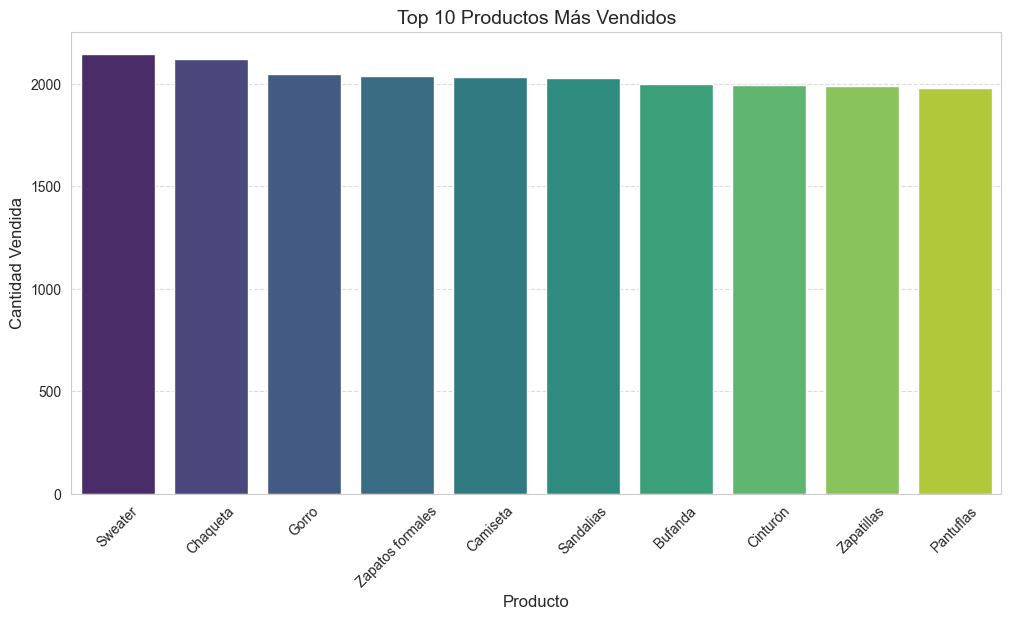

C:\Users\xavsc\AppData\Local\Temp\ipykernel_22704\606378861.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_productos.tail(10)['product_name'], y=df_productos.tail(10)['total_vendido'], palette="coolwarm")


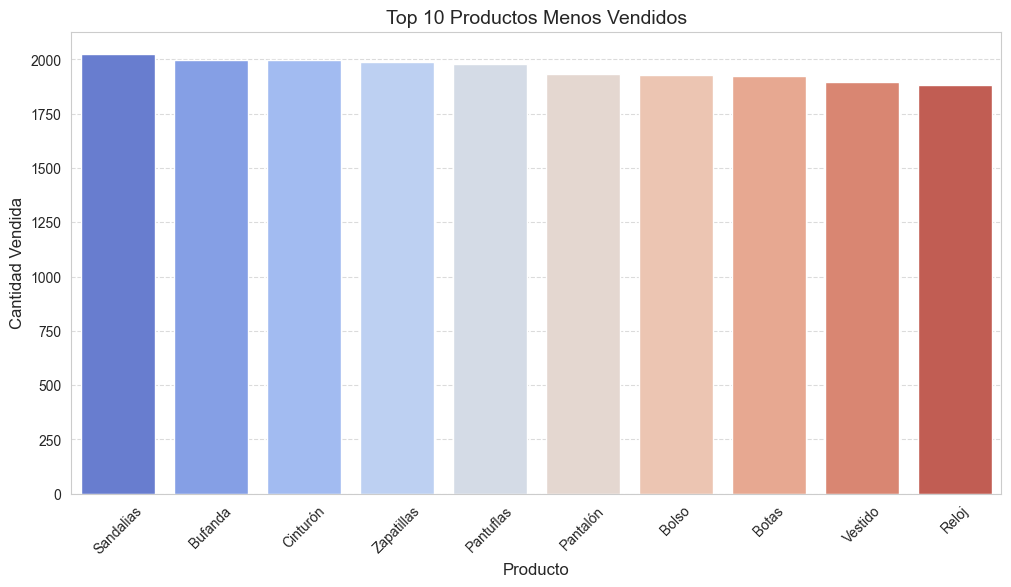

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv

# 🔹 Cargar variables de entorno
load_dotenv()

# 🔹 Función para obtener los productos más vendidos
def obtener_productos_mas_vendidos():
    motor = create_engine(f"mysql+mysqlconnector://{os.getenv('MYSQLUSER')}:{os.getenv('MYSQLPASSWORD')}@{os.getenv('MYSQLHOST')}:{os.getenv('MYSQLPORT')}/{os.getenv('MYSQLDATABASE')}")
    
    consulta = """
    SELECT od.product_name, 
           SUM(od.quantity) AS total_vendido
    FROM order_details od
    GROUP BY od.product_name
    ORDER BY total_vendido DESC;
    """
    
    datos = pd.read_sql(consulta, motor)
    return datos

# 🔹 Obtener los datos de los productos más vendidos
df_productos = obtener_productos_mas_vendidos()

# 🔹 Mostrar los 10 productos más y menos vendidos
print("Productos más vendidos:\n", df_productos.head(10))
print("\nProductos menos vendidos:\n", df_productos.tail(10))

# 🔹 Gráfico de los productos más vendidos
plt.figure(figsize=(12, 6))
sns.barplot(x=df_productos.head(10)['product_name'], y=df_productos.head(10)['total_vendido'], palette="viridis")
plt.title("Top 10 Productos Más Vendidos", fontsize=14)
plt.xlabel("Producto", fontsize=12)
plt.ylabel("Cantidad Vendida", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 🔹 Gráfico de los productos menos vendidos
plt.figure(figsize=(12, 6))
sns.barplot(x=df_productos.tail(10)['product_name'], y=df_productos.tail(10)['total_vendido'], palette="coolwarm")
plt.title("Top 10 Productos Menos Vendidos", fontsize=14)
plt.xlabel("Producto", fontsize=12)
plt.ylabel("Cantidad Vendida", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


  grupo_edad  total_pedidos  total_gastado  promedio_gasto
0      18-25           7644     2417202.44      316.222193
1      26-35           2007      621967.21      309.898959
2      36-45            267       83282.76      311.920449
3      46-60             49       13476.76      275.035918
4        60+             10        3569.51      356.951000


C:\Users\xavsc\AppData\Local\Temp\ipykernel_22704\3545799634.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_edad['grupo_edad'], y=df_edad['total_pedidos'], palette="Blues_r")


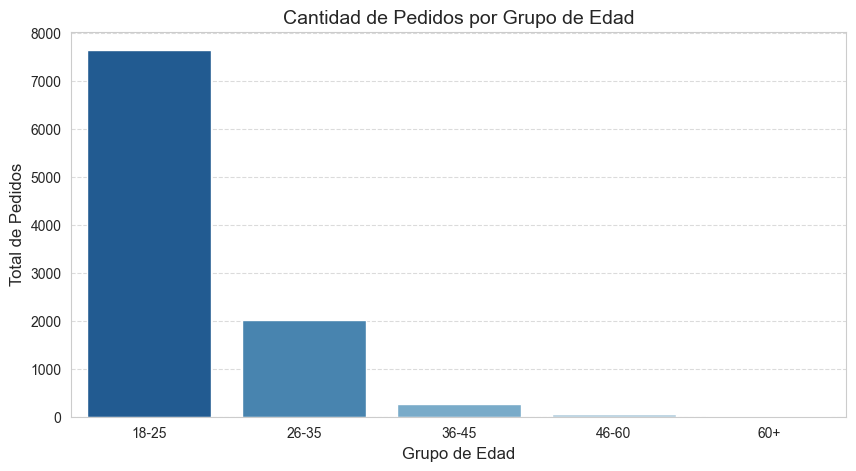

C:\Users\xavsc\AppData\Local\Temp\ipykernel_22704\3545799634.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_edad['grupo_edad'], y=df_edad['total_gastado'], palette="Reds_r")


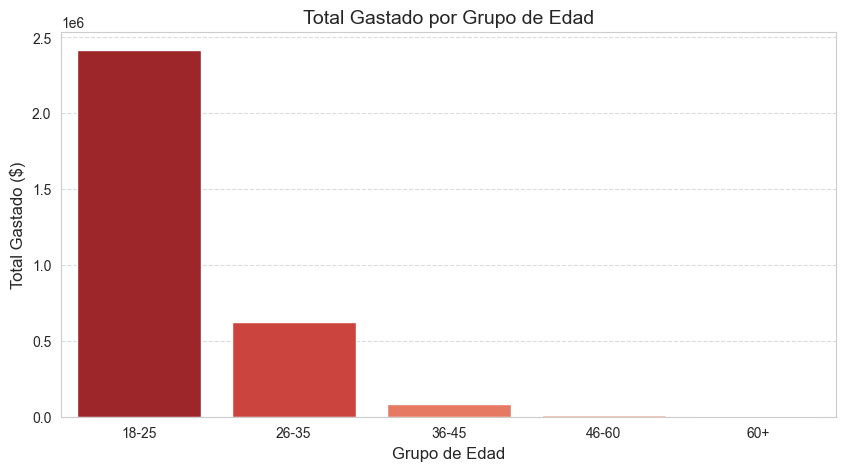

C:\Users\xavsc\AppData\Local\Temp\ipykernel_22704\3545799634.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_edad['grupo_edad'], y=df_edad['promedio_gasto'], palette="Greens_r")


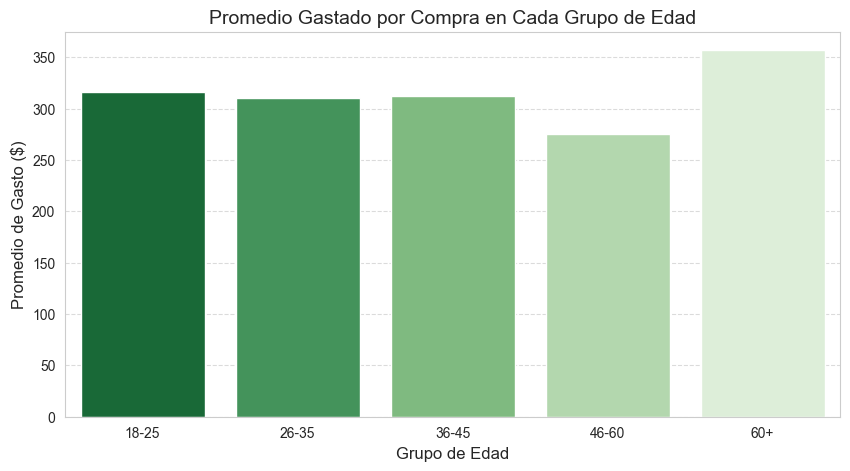

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv

# 🔹 Cargar variables de entorno
load_dotenv()

# 🔹 Función para obtener los patrones de compra por edad
def obtener_patrones_compra():
    motor = create_engine(f"mysql+mysqlconnector://{os.getenv('MYSQLUSER')}:{os.getenv('MYSQLPASSWORD')}@{os.getenv('MYSQLHOST')}:{os.getenv('MYSQLPORT')}/{os.getenv('MYSQLDATABASE')}")
    
    consulta = """
    SELECT 
        CASE 
            WHEN c.customer_age BETWEEN 18 AND 25 THEN '18-25'
            WHEN c.customer_age BETWEEN 26 AND 35 THEN '26-35'
            WHEN c.customer_age BETWEEN 36 AND 45 THEN '36-45'
            WHEN c.customer_age BETWEEN 46 AND 60 THEN '46-60'
            ELSE '60+'
        END AS grupo_edad,
        COUNT(o.order_id) AS total_pedidos,
        SUM(o.order_total) AS total_gastado,
        AVG(o.order_total) AS promedio_gasto
    FROM customers c
    JOIN orders o ON c.customer_id = o.customer_id
    GROUP BY grupo_edad
    ORDER BY total_gastado DESC;
    """
    
    datos = pd.read_sql(consulta, motor)
    return datos

# 🔹 Obtener los datos
df_edad = obtener_patrones_compra()

# 🔹 Mostrar datos
print(df_edad)

# 🔹 Gráfico: Total de compras por grupo de edad
plt.figure(figsize=(10, 5))
sns.barplot(x=df_edad['grupo_edad'], y=df_edad['total_pedidos'], palette="Blues_r")
plt.title("Cantidad de Pedidos por Grupo de Edad", fontsize=14)
plt.xlabel("Grupo de Edad", fontsize=12)
plt.ylabel("Total de Pedidos", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 🔹 Gráfico: Total gastado por grupo de edad
plt.figure(figsize=(10, 5))
sns.barplot(x=df_edad['grupo_edad'], y=df_edad['total_gastado'], palette="Reds_r")
plt.title("Total Gastado por Grupo de Edad", fontsize=14)
plt.xlabel("Grupo de Edad", fontsize=12)
plt.ylabel("Total Gastado ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 🔹 Gráfico: Promedio gastado por compra en cada grupo de edad
plt.figure(figsize=(10, 5))
sns.barplot(x=df_edad['grupo_edad'], y=df_edad['promedio_gasto'], palette="Greens_r")
plt.title("Promedio Gastado por Compra en Cada Grupo de Edad", fontsize=14)
plt.xlabel("Grupo de Edad", fontsize=12)
plt.ylabel("Promedio de Gasto ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


      genero grupo_edad  total_pedidos  total_gastado  promedio_gasto
0   Femenino      18-25           3785     1197211.08      316.304116
1   Femenino      26-35           1033      316171.64      306.071288
2   Femenino      36-45            173       54876.29      317.203988
3   Femenino        60+              5        2203.93      440.786000
4   Femenino      46-60              8        1932.35      241.543750
5  Masculino      18-25           3859     1219991.36      316.141840
6  Masculino      26-35            974      305795.57      313.958491
7  Masculino      36-45             94       28406.47      302.196489
8  Masculino      46-60             41       11544.41      281.570976
9  Masculino        60+              5        1365.58      273.116000


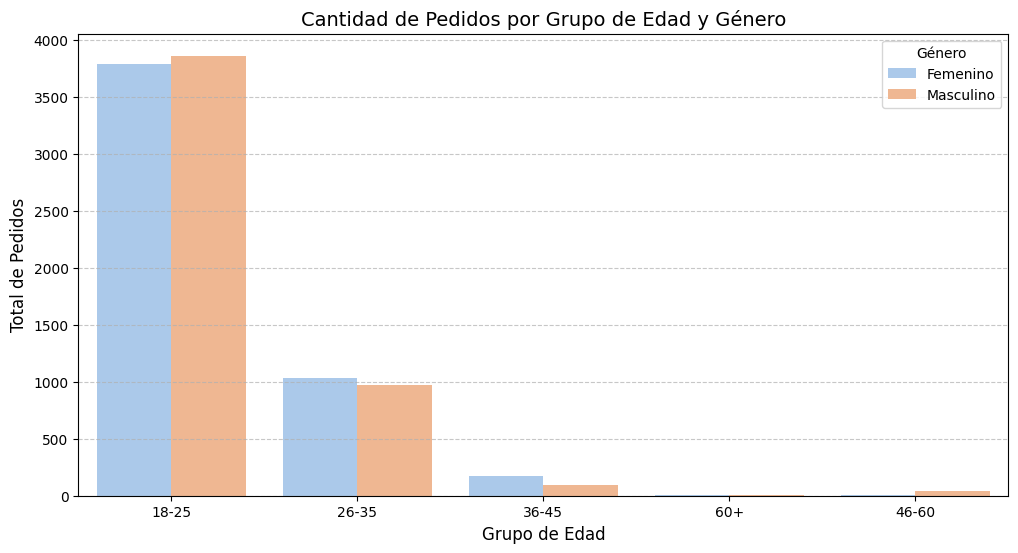

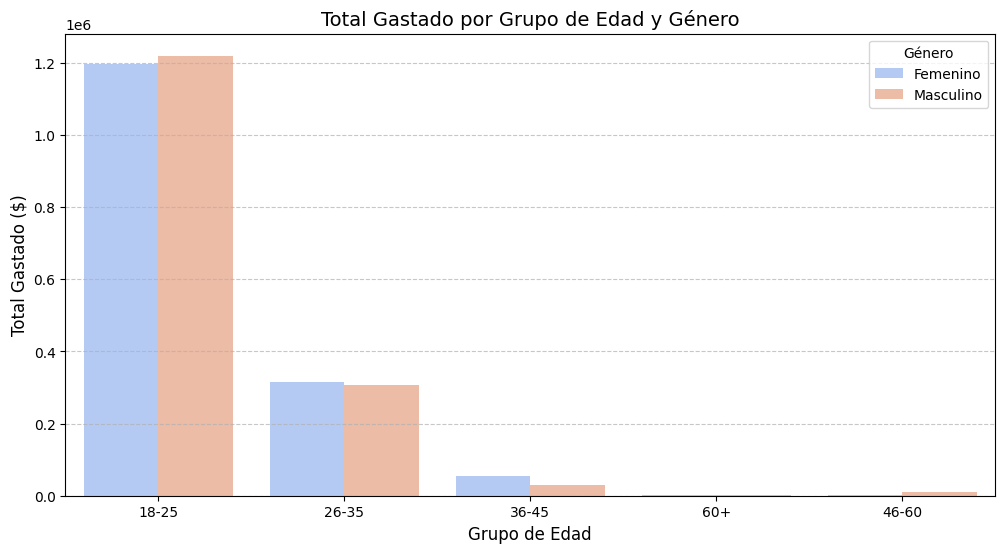

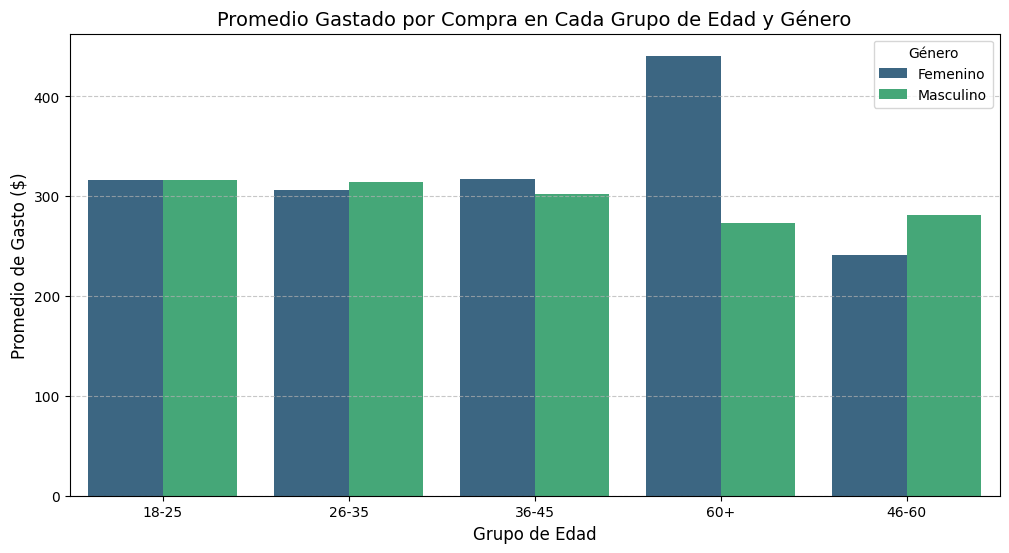

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv

# 🔹 Cargar variables de entorno
load_dotenv()

# 🔹 Función para obtener los patrones de compra por edad y género
def obtener_patrones_compra():
    motor = create_engine(f"mysql+mysqlconnector://{os.getenv('MYSQLUSER')}:{os.getenv('MYSQLPASSWORD')}@{os.getenv('MYSQLHOST')}:{os.getenv('MYSQLPORT')}/{os.getenv('MYSQLDATABASE')}")

    consulta = """
    SELECT 
        c.customer_gender AS genero,
        CASE 
            WHEN c.customer_age BETWEEN 18 AND 25 THEN '18-25'
            WHEN c.customer_age BETWEEN 26 AND 35 THEN '26-35'
            WHEN c.customer_age BETWEEN 36 AND 45 THEN '36-45'
            WHEN c.customer_age BETWEEN 46 AND 60 THEN '46-60'
            ELSE '60+'
        END AS grupo_edad,
        COUNT(o.order_id) AS total_pedidos,
        SUM(o.order_total) AS total_gastado,
        AVG(o.order_total) AS promedio_gasto
    FROM customers c
    JOIN orders o ON c.customer_id = o.customer_id
    GROUP BY genero, grupo_edad
    ORDER BY genero, total_gastado DESC;
    """

    datos = pd.read_sql(consulta, motor)
    return datos

# 🔹 Obtener los datos
df_edad_genero = obtener_patrones_compra()

# 🔹 Mostrar datos
print(df_edad_genero)

# 🔹 Gráfico: Total de compras por grupo de edad y género
plt.figure(figsize=(12, 6))
sns.barplot(x=df_edad_genero['grupo_edad'], y=df_edad_genero['total_pedidos'], hue=df_edad_genero['genero'], palette="pastel")
plt.title("Cantidad de Pedidos por Grupo de Edad y Género", fontsize=14)
plt.xlabel("Grupo de Edad", fontsize=12)
plt.ylabel("Total de Pedidos", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Género")
plt.show()

# 🔹 Gráfico: Total gastado por grupo de edad y género
plt.figure(figsize=(12, 6))
sns.barplot(x=df_edad_genero['grupo_edad'], y=df_edad_genero['total_gastado'], hue=df_edad_genero['genero'], palette="coolwarm")
plt.title("Total Gastado por Grupo de Edad y Género", fontsize=14)
plt.xlabel("Grupo de Edad", fontsize=12)
plt.ylabel("Total Gastado ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Género")
plt.show()

# 🔹 Gráfico: Promedio gastado por compra en cada grupo de edad y género
plt.figure(figsize=(12, 6))
sns.barplot(x=df_edad_genero['grupo_edad'], y=df_edad_genero['promedio_gasto'], hue=df_edad_genero['genero'], palette="viridis")
plt.title("Promedio Gastado por Compra en Cada Grupo de Edad y Género", fontsize=14)
plt.xlabel("Grupo de Edad", fontsize=12)
plt.ylabel("Promedio de Gasto ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Género")
plt.show()


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Cargar las variables de entorno
load_dotenv()

# Crear conexión a la base de datos en AWS
motor = create_engine(f"mysql+mysqlconnector://{os.getenv('MYSQLUSER')}:{os.getenv('MYSQLPASSWORD')}@{os.getenv('MYSQLHOST')}:{os.getenv('MYSQLPORT')}/{os.getenv('MYSQLDATABASE')}")

# Consulta: Correlación entre categoría de producto y método de pago
consulta = """
    SELECT 
        product_category AS categoria_producto,
        payment_method AS metodo_pago,
        COUNT(*) AS total_transacciones
    FROM ventas
    GROUP BY categoria_producto, metodo_pago
    ORDER BY categoria_producto, total_transacciones DESC;
"""

# Ejecutar la consulta y almacenar los datos en un DataFrame
df_pago_categoria = pd.read_sql(consulta, motor)

# Mostrar los primeros resultados para verificar
print(df_pago_categoria.head())


  categoria_producto             metodo_pago  total_transacciones
0         Accesorios      Tarjeta de crédito                  843
1         Accesorios  Transferencia bancaria                  836
2         Accesorios                Efectivo                  816
3         Accesorios                  PayPal                  807
4            Calzado  Transferencia bancaria                  859


c:\Users\xavsc\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


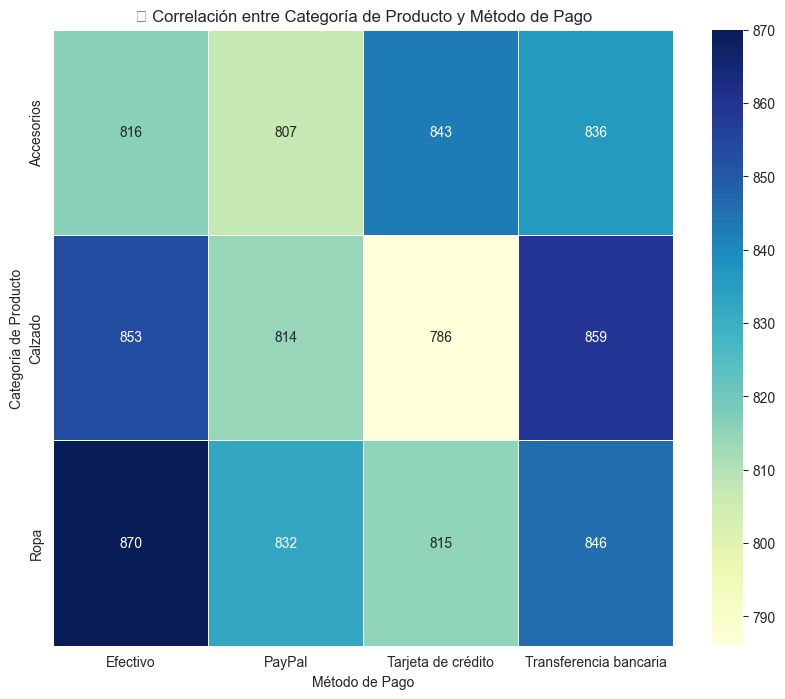

In [2]:
# Ajustar el estilo de los gráficos
sns.set_style("whitegrid")

# Pivotar los datos para el heatmap
tabla_pivot = df_pago_categoria.pivot(index='categoria_producto', columns='metodo_pago', values='total_transacciones').fillna(0)

# 📊 Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(tabla_pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("🔍 Correlación entre Categoría de Producto y Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Categoría de Producto")
plt.show()
